In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Install and import geopandas library (b.c. I'd like to create some map plots)
# Download U.S. State shapefile -> from https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html


# pip install geopandas
import geopandas as gpd

## Preparing Superstore dataset

In [3]:
# import data (.csv file)
storedf = pd.read_csv(r'/Users/pims/Desktop/projects/superstore/analysis-superstore/SuperStoreUS.csv')
storedf.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,07/01/2015,08/01/2015,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,13/06/2015,15/06/2015,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,15/02/2015,17/02/2015,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,12/05/2015,14/05/2015,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,12/05/2015,13/05/2015,-24.0300,7,22.23,86838


In [4]:
# Get to know the data
storedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                1952 non-null   int64  
 1   Order Priority        1952 non-null   object 
 2   Discount              1952 non-null   float64
 3   Unit Price            1952 non-null   float64
 4   Shipping Cost         1952 non-null   float64
 5   Customer ID           1952 non-null   int64  
 6   Customer Name         1952 non-null   object 
 7   Ship Mode             1952 non-null   object 
 8   Customer Segment      1952 non-null   object 
 9   Product Category      1952 non-null   object 
 10  Product Sub-Category  1952 non-null   object 
 11  Product Container     1952 non-null   object 
 12  Product Name          1952 non-null   object 
 13  Product Base Margin   1936 non-null   float64
 14  Country               1952 non-null   object 
 15  Region               

Note :
- There is no null value in the dataset
- Order date & Ship date are strings

In [5]:
# Replace space in headers with _
newheaders = []
for h in storedf.columns:
    h = h.replace(' ','_')
    newheaders.append(h)

In [6]:
storedf.columns = newheaders
storedf.head()

,Row_ID,Order_Priority,Discount,Unit_Price,Shipping_Cost,Customer_ID,Customer_Name,Ship_Mode,Customer_Segment,Product_Category,...,Region,State_or_Province,City,Postal_Code,Order_Date,Ship_Date,Profit,Quantity_ordered_new,Sales,Order_ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,07/01/2015,08/01/2015,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,13/06/2015,15/06/2015,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,15/02/2015,17/02/2015,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,12/05/2015,14/05/2015,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,12/05/2015,13/05/2015,-24.0300,7,22.23,86838


In [7]:
# Convert Order_Date & Ship_Date into date in terms of their types
storedf['Order_Date'] = pd.to_datetime(storedf['Order_Date'],format='%d/%m/%Y')
storedf['Ship_Date'] = pd.to_datetime(storedf['Ship_Date'],format='%d/%m/%Y')
storedf.head()

,Row_ID,Order_Priority,Discount,Unit_Price,Shipping_Cost,Customer_ID,Customer_Name,Ship_Mode,Customer_Segment,Product_Category,...,Region,State_or_Province,City,Postal_Code,Order_Date,Ship_Date,Profit,Quantity_ordered_new,Sales,Order_ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838


In [8]:
storedf.Order_Priority.unique()

array(['High', 'Not Specified', 'Critical', 'Medium', 'Low', 'Critical '],
      dtype=object)

Note :
- There are 2 of Criticals (with and without trailing space), I'll get rid of the trailing space

In [9]:
storedf['Order_Priority'] = storedf['Order_Priority'].str.strip()

## Peparing U.S. State shapefile

In [11]:
states = gpd.read_file('/Users/pims/Desktop/projects/superstore/analysis-superstore/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
states.head()               

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [12]:
# Get to know the coordinate reference system (crs)
states.crs 

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<AxesSubplot:>

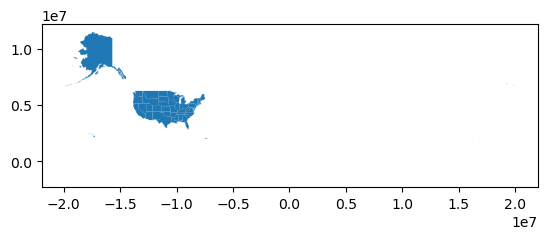

In [13]:
# Make the map look more familiar (like ggmaps)
states = states.to_crs('EPSG:3395')
states.plot()

Note :
- There are some non-continental states in the map above.

In [14]:
# Remove non-continental us states except Rhode Island because storedf has got this state
states = states[~states['NAME'].isin(['Alaska', 'Hawaii', 
                                    'Puerto Rico',
                                    'United States Virgin Islands',
                                    'Commonwealth of the Northern Mariana Islands',
                                   'American Samoa',
                                   'Guam'])].reset_index()

<AxesSubplot:>

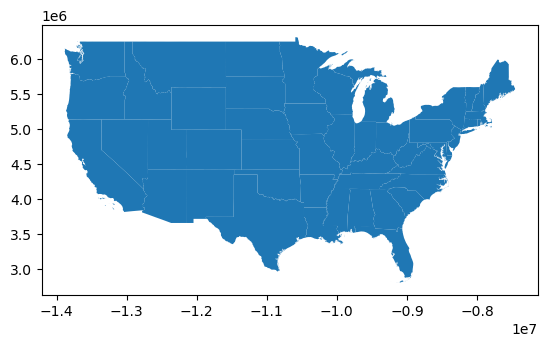

In [15]:
states.plot()

In [16]:
# Check if there are unmatched state names
statesname0 = states.NAME.unique().tolist()
statesname1 = storedf.State_or_Province.unique().tolist()

In [17]:
for i in statesname1:
    if i not in statesname0:
        print(i)

Note :
- 100% Same name

## 1. What is the distribution of days the order takes depends on it's priority ?

In [18]:
# Create the new column which is the difference between order date and ship date
storedf1 = storedf.copy()
storedf1['Diff_Days'] = (storedf1['Ship_Date'] - storedf1['Order_Date']) / np.timedelta64(1, 'D')
storedf1.head()

,Row_ID,Order_Priority,Discount,Unit_Price,Shipping_Cost,Customer_ID,Customer_Name,Ship_Mode,Customer_Segment,Product_Category,...,State_or_Province,City,Postal_Code,Order_Date,Ship_Date,Profit,Quantity_ordered_new,Sales,Order_ID,Diff_Days
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522,1.0
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,2.0
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,2.0
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,2.0
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838,1.0


Text(0.5, 9.444444444444438, 'Shipping Days')

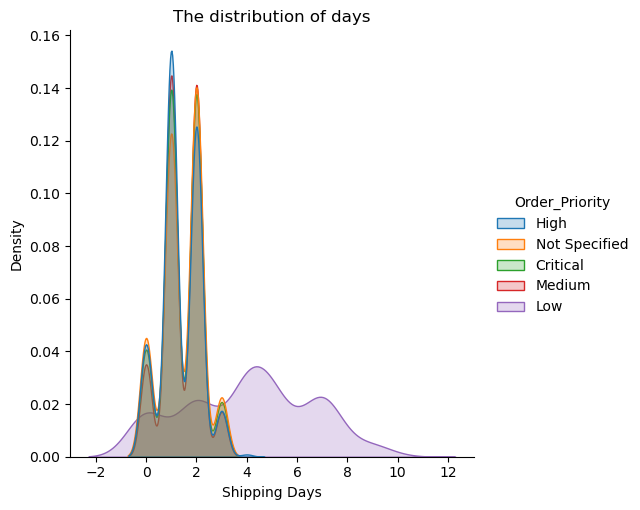

In [27]:
sns.displot(storedf1, x='Diff_Days',hue='Order_Priority' ,kind='kde', fill=True)
plt.title('The distribution of days')
plt.xlabel('Shipping Days')

Note : 
- The number of days changes depend on the order's priority.
- The most common number of shipping days in High,Medium, Critical and Not Specified priority are almost the same, is approximately 1-2 days.
- The number of shipping days for low priority varies and is typically longer than for other priorities.

## 2. What is the most effective delivery way ?

In [28]:
storedf.groupby('Ship_Mode')['Row_ID'].count()

Ship_Mode
Delivery Truck     275
Express Air        240
Regular Air       1437
Name: Row_ID, dtype: int64

Note :
- Regular air is the most popular shipping method.

Text(0.5, 1.0, 'The number of orders by Ship mode')

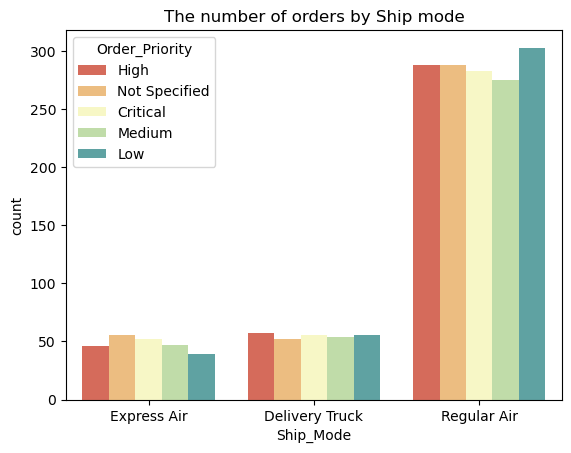

In [31]:
sns.countplot(data = storedf, x = 'Ship_Mode', hue = 'Order_Priority',palette='Spectral')
plt.title('The number of orders by Ship mode')

- Regular air is the most popular shipping method in every order priority.

In [32]:
storedf1.groupby('Ship_Mode')['Diff_Days'].describe()

,count,mean,std,min,25%,50%,75%,max
Ship_Mode,,,,,,,,
Delivery Truck,275.0,1.894545,1.625461,0.0,1.0,2.0,2.0,9.0
Express Air,240.0,1.800000,1.420708,0.0,1.0,2.0,2.0,8.0
Regular Air,1437.0,1.972860,1.764700,0.0,1.0,2.0,2.0,10.0


- The nummber of Shipping days are almost equal in every method.

In [36]:
storedf.groupby('Ship_Mode')['Product_Category'].agg(pd.Series.mode)

Ship_Mode
Delivery Truck          Furniture
Express Air       Office Supplies
Regular Air       Office Supplies
Name: Product_Category, dtype: object

- Truck Delivery is famous for funitures

- To sum up, Regular Air is the most selected shipping method, however there is no difference in term of shipping time. People tend to choose Delivery Truck if they ordered heavy stuff like furniture.

## 3.There is a relationship between priority and profit ?

In [41]:
storedf.groupby('Order_Priority')['Profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Order_Priority,,,,,,,,
Critical,391.0,97.968640,1145.592989,-13706.464000,-71.98100,2.70600,158.271650,4899.1288
High,391.0,93.351742,852.304277,-3061.820000,-96.16000,-1.07120,103.551150,7402.3200
Low,398.0,88.982043,1209.750777,-14140.701600,-91.86700,6.56283,115.733475,8798.1831
Medium,376.0,115.346069,1428.434330,-16476.838000,-77.22843,3.12850,112.977000,7024.2069
Not Specified,396.0,177.995878,1002.567399,-5390.738892,-85.46160,-4.38050,116.732925,9228.2256


Text(0.5, 1.0, 'The relationship between Priority and Profit')

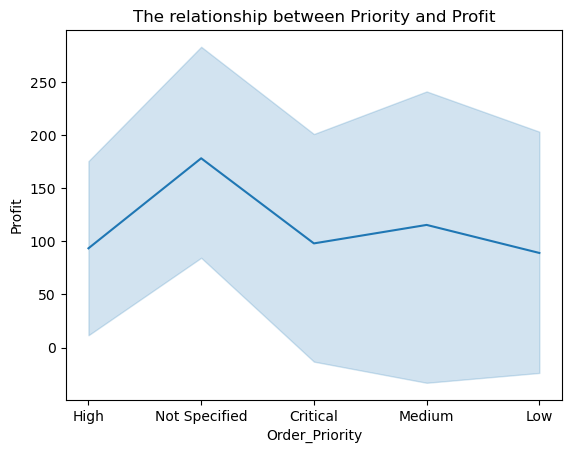

In [43]:
sns.lineplot(data=storedf, x='Order_Priority', y='Profit')
plt.title('The relationship between Priority and Profit')
# The mean and 95% confidence interval

Note : 
- The mean number of Not Specified priority is higher in profit, The rests are almost the same in term of profit.
- We can find lost orders in every kind of order priority.

## 4. Which category sells more and in which state ?

In [44]:
storedf.groupby('Product_Category')['Row_ID'].count().reset_index()

,Product_Category,Row_ID
0,Furniture,400
1,Office Supplies,1071
2,Technology,481


Note : 
- Office Supplies are most sold

In [45]:
storedf4 = storedf[storedf['Product_Category'] == 'Office Supplies']
techbystate = storedf4.groupby('State_or_Province')['Row_ID'].count().reset_index()
techbystate.head()

,State_or_Province,Row_ID
0,Alabama,6
1,Arizona,18
2,Arkansas,9
3,California,129
4,Colorado,23


In [46]:
plot4 = pd.merge(left=techbystate,right=states,left_on='State_or_Province',
                right_on='NAME',how='left')
gplot4 = gpd.GeoDataFrame(plot4)

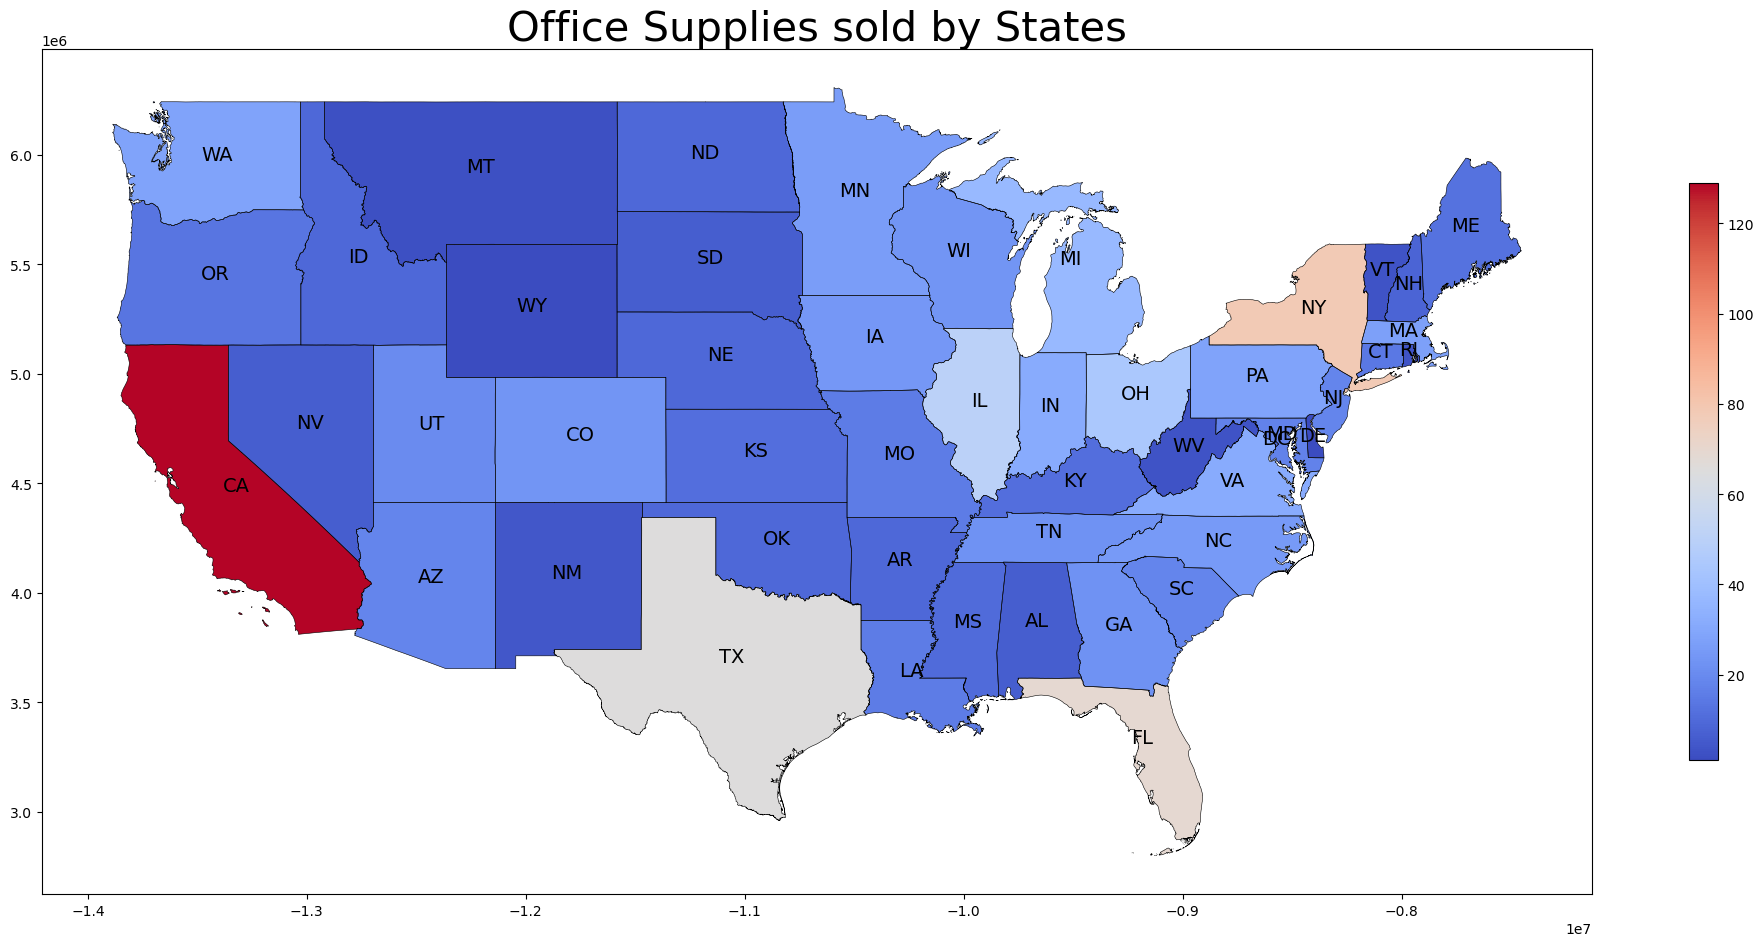

In [63]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
ax.set_title('Office Supplies sold by States',size=30)
gplot4.apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], 
                                   ha='center', fontsize=14),axis=1)
gplot4.boundary.plot(ax=ax, color='Black', linewidth=.4)
gplot4.plot(ax=ax, column='Row_ID',legend=True,cmap='coolwarm'
                ,legend_kwds={'shrink':0.5})

plt.show()

## 5. What is the number of order in each region and it's profit ?

In [50]:
countbyreg = storedf.groupby('Region')['Row_ID'].count().reset_index()
countbyreg

,Region,Row_ID
0,Central,566
1,East,474
2,South,442
3,West,470


In [51]:
# Add Region column into States dataframe
regiondf = storedf[['Region','State_or_Province']].drop_duplicates(keep='first').reset_index(drop=True)
StateswRegion = pd.merge(left=regiondf, right=states,
                        left_on='State_or_Province',right_on='NAME',
                        how='left')
StateswRegion.head()

,Region,State_or_Province,index,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,West,Washington,11,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-13644473.624 6164767.911, -13..."
1,West,California,16,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-13202983.084 3935428.267, -13..."
2,East,New Jersey,39,34,01779795,0400000US34,34,NJ,New Jersey,00,19047825980,3544860246,"POLYGON ((-8411200.759 4784925.261, -8411239.0..."
3,Central,Minnesota,54,27,00662849,0400000US27,27,MN,Minnesota,00,206228939448,18945217189,"MULTIPOLYGON (((-9973342.276 6069560.797, -997..."
4,East,New York,25,36,01779796,0400000US36,36,NY,New York,00,122049149763,19246994695,"MULTIPOLYGON (((-8019103.214 5021083.719, -801..."


In [52]:
StateswRegion.Region.unique() # There are 4 regions

array(['West', 'East', 'Central', 'South'], dtype=object)

In [53]:
# Merge 2 dataframes
plot5 = pd.merge(left=StateswRegion, right=countbyreg,
                        left_on='Region',right_on='Region',
                        how='left')

In [54]:
gplot5 = gpd.GeoDataFrame(plot5)

In [55]:
# Aggregate geomatric feature (group by region)
gplot5diss = gplot5.dissolve(by='Region',aggfunc='mean')

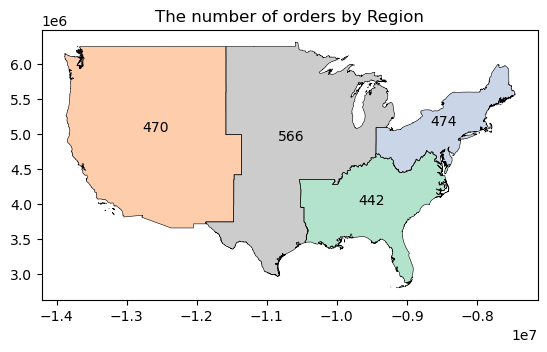

In [61]:
import math
fig = plt.figure() 
ax = fig.add_subplot()
ax.set_title('The number of orders by Region')
gplot5diss.apply(lambda x: ax.annotate(text= str(math.floor(x.Row_ID))
                                       ,xy=x.geometry.centroid.coords[0], 
                                        ha='center', fontsize=25),axis=1)
gplot5diss.boundary.plot(ax=ax, color='Black', linewidth=.4)
gplot5diss.plot(ax=ax, column='Row_ID',cmap='Pastel2')

plt.show()

In [64]:
profbyreg = storedf.groupby('Region')['Profit'].mean().reset_index()
profbyreg

,Region,Profit
0,Central,136.688114
1,East,179.939670
2,South,-32.633607
3,West,161.371894


In [65]:
plot5extra = pd.merge(left=StateswRegion, right=profbyreg,
                        left_on='Region',right_on='Region',
                        how='left')

In [66]:
gplot5extra = gpd.GeoDataFrame(plot5extra)

In [67]:
gplot5extradiss = gplot5extra.dissolve(by='Region',aggfunc='mean')

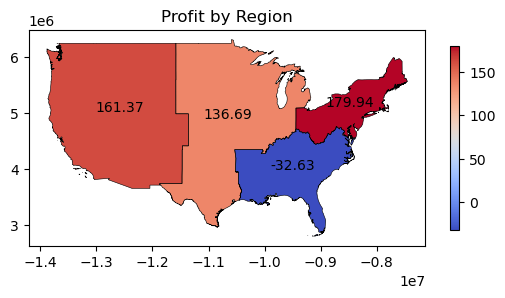

In [69]:
fig = plt.figure() 
ax = fig.add_subplot()
ax.set_title('Profit by Region')
gplot5extradiss.apply(lambda x: ax.annotate(text= str(round(x.Profit,2))
                                       ,xy=x.geometry.centroid.coords[0], 
                                        ha='center'),axis=1)
gplot5extradiss.boundary.plot(ax=ax, color='Black', linewidth=.4)
gplot5extradiss.plot(ax=ax, column='Profit',legend=True,cmap='coolwarm'
                ,legend_kwds={'shrink':0.5})

plt.show()

## 6. In which month we have best sales ?

In [70]:
storedf6 = storedf.copy()
storedf6['Order_M'] = pd.DatetimeIndex(storedf6['Order_Date']).month

In [71]:
monthmostsales = storedf6.groupby('Order_M')['Sales'].sum().reset_index()
monthmostsales = monthmostsales.sort_values(by='Sales',ascending=False)
monthmostsales

,Order_M,Sales
3,4,389831.95
5,6,355368.80
1,2,326101.47
4,5,306572.07
0,1,274766.92
2,3,271696.67


Note :
- 4th month (April) has best sales
- 3rd month (March) has least sales

## 7. Which state has most profit ?

In [73]:
# Top 5 states have most profit
mostprof = storedf.groupby('State_or_Province',sort=True)['Profit'].sum().nlargest(5).reset_index()
mostprof

,State_or_Province,Profit
0,California,37421.960192
1,Texas,28078.850660
2,New York,27611.943319
3,Ohio,23410.842026
4,Oregon,17931.043400


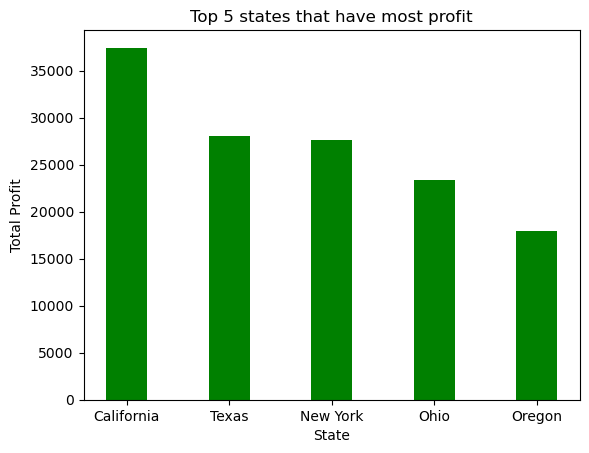

In [78]:
state = mostprof.State_or_Province
sums = mostprof.Profit 

fig = plt.figure()

plt.bar(state, sums, color='green',width = 0.4)
plt.xlabel("State")
plt.ylabel("Total Profit")
plt.title("Top 5 states that have most profit")
plt.show()

Note :
- The most profitable state is California

In [79]:
# Plot state 
stateprof = storedf.groupby('State_or_Province',sort=True)['Profit'].sum().reset_index()
plot9extra = pd.merge(left=stateprof,right=states,
                      left_on='State_or_Province',
                      right_on='NAME',how='left') 

In [80]:
plot9extra.head()

,State_or_Province,Profit,index,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,Alabama,-2418.056600,17,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-9802056.868 3547198.514, -980..."
1,Arizona,3909.753832,35,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-12781291.383 3807223.522, -12781071..."
2,Arkansas,-1184.747200,52,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-10532808.986 4344142.100, -10532788..."
3,California,37421.960192,16,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-13202983.084 3935428.267, -13..."
4,Colorado,6965.462660,21,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-12140531.830 4637779.188, -12140452..."


In [81]:
gplot9extra = gpd.GeoDataFrame(plot9extra)

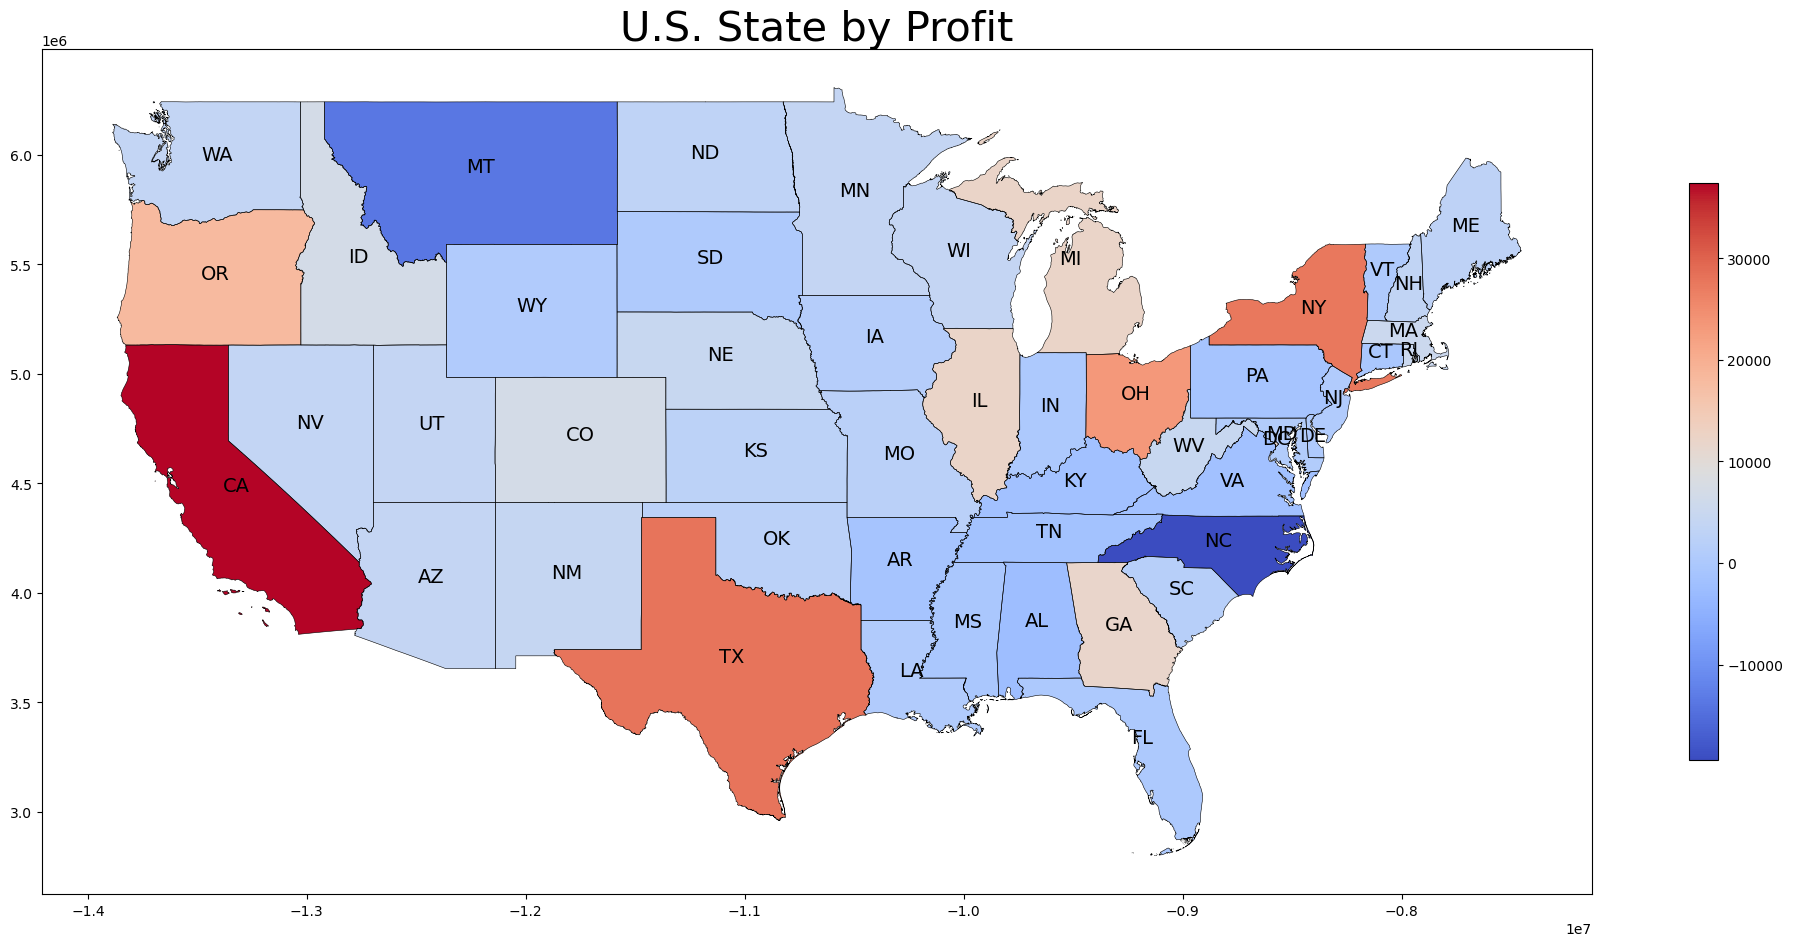

In [83]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
ax.set_title('U.S. State by Profit',size=30)
gplot9extra.apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], 
                                        ha='center', fontsize=14),axis=1)
gplot9extra.boundary.plot(ax=ax, color='Black', linewidth=.4)
gplot9extra.plot(ax=ax, column='Profit',legend=True,cmap='coolwarm'
                ,legend_kwds={'shrink':0.5})

plt.show()

## 8. Which state has least profit ?

In [84]:
# Top 5 states have most profit
leastprof = storedf.groupby('State_or_Province',sort=True)['Profit'].sum().nsmallest(5).reset_index()
leastprof

,State_or_Province,Profit
0,North Carolina,-19427.91484
1,Montana,-13759.20549
2,Alabama,-2418.05660
3,Kentucky,-1842.50960
4,Virginia,-1748.55170


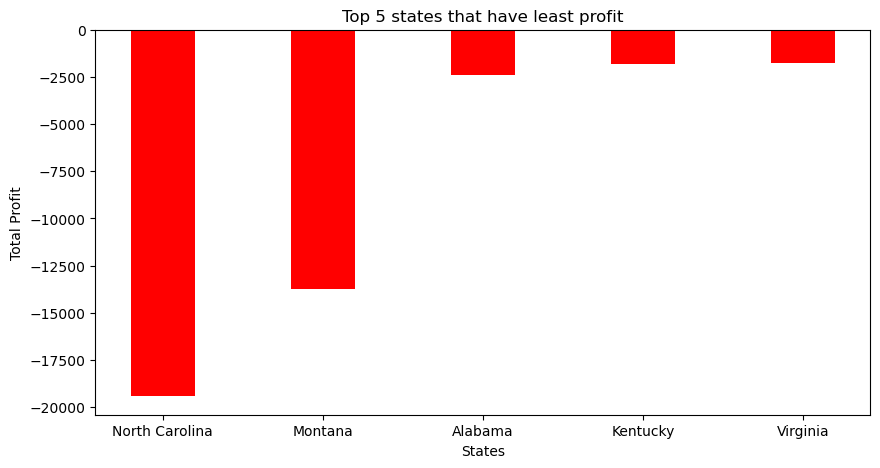

In [85]:
state = leastprof.State_or_Province
sums = leastprof.Profit 

fig = plt.figure(figsize = (10,5))

plt.bar(state, sums, color='red',width = 0.4)
plt.xlabel("States")
plt.ylabel("Total Profit")
plt.title("Top 5 states that have least profit")
plt.show()

Note :
- The least profitable state is North Carolina

## 9. Which city in most profit state has most profit ?
- From no.7, the most profitable state = California

In [86]:
storedf11 = storedf[storedf['State_or_Province'] == 'California'].reset_index(drop=True)
storedf11.head()

,Row_ID,Order_Priority,Discount,Unit_Price,Shipping_Cost,Customer_ID,Customer_Name,Ship_Mode,Customer_Segment,Product_Category,...,Region,State_or_Province,City,Postal_Code,Order_Date,Ship_Date,Profit,Quantity_ordered_new,Sales,Order_ID
0,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
1,20631,High,0.06,55.48,14.30,24,Edna Thomas,Regular Air,Corporate,Office Supplies,...,West,California,Laguna Niguel,92677,2015-01-28,2015-01-29,-28.2968,1,67.49,87651
2,20632,High,0.02,1.68,1.57,24,Edna Thomas,Regular Air,Corporate,Office Supplies,...,West,California,Laguna Niguel,92677,2015-01-28,2015-01-30,-5.3072,1,2.25,87651
3,23967,Not Specified,0.04,4.14,6.60,27,Guy Gallagher,Regular Air,Corporate,Furniture,...,West,California,Lakewood,90712,2015-05-02,2015-05-04,8.8940,12,54.78,87652
4,23274,Low,0.05,155.06,7.07,67,Ellen McCormick,Regular Air,Corporate,Office Supplies,...,West,California,Napa,94559,2015-01-02,2015-01-09,845.6640,8,1225.60,87946


In [87]:
mostprofcity = storedf11.groupby('City',sort=True)['Profit'].sum().nlargest(5).reset_index()
mostprofcity

,City,Profit
0,Los Angeles,7865.83718
1,Davis,4634.70240
2,San Gabriel,4371.48810
3,Chico,3031.97240
4,Huntington Beach,2598.08350


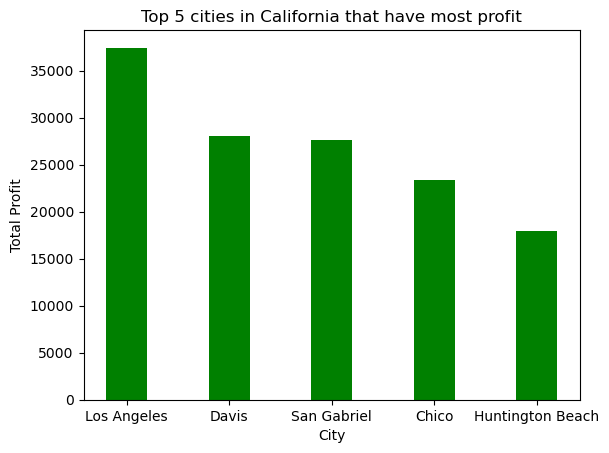

In [89]:
city = mostprofcity.City
sums = mostprof.Profit 

fig = plt.figure()

plt.bar(city, sums, color='green',width = 0.4)
plt.xlabel("City")
plt.ylabel("Total Profit")
plt.title("Top 5 cities in California that have most profit")
plt.show()

Note :
- The most profitable city in California is Los Angles

## 10. Which city in least profit state has least profit ?
- From no.8, the least profitable state = North Carolina

In [90]:
storedf12 = storedf[storedf['State_or_Province'] == 'North Carolina'].reset_index(drop=True)
storedf12.head()

,Row_ID,Order_Priority,Discount,Unit_Price,Shipping_Cost,Customer_ID,Customer_Name,Ship_Mode,Customer_Segment,Product_Category,...,Region,State_or_Province,City,Postal_Code,Order_Date,Ship_Date,Profit,Quantity_ordered_new,Sales,Order_ID
0,21203,Medium,0.03,60.89,32.41,228,Colleen Andrews,Delivery Truck,Small Business,Furniture,...,South,North Carolina,Mint Hill,28227,2015-04-02,2015-04-03,36.3540,7,450.49,88527
1,770,Low,0.02,5.58,5.30,272,Eleanor Swain,Regular Air,Home Office,Office Supplies,...,South,North Carolina,Charlotte,28204,2015-04-07,2015-04-12,-29.8984,11,68.46,5509
2,771,Low,0.03,40.89,18.98,272,Eleanor Swain,Regular Air,Home Office,Furniture,...,South,North Carolina,Charlotte,28204,2015-04-07,2015-04-14,52.9166,21,885.23,5509
3,5059,Low,0.09,35.94,6.66,272,Eleanor Swain,Regular Air,Home Office,Office Supplies,...,South,North Carolina,Charlotte,28204,2015-06-05,2015-06-10,72.1858,24,836.47,36069
4,5061,Low,0.09,4.98,7.44,272,Eleanor Swain,Regular Air,Home Office,Office Supplies,...,South,North Carolina,Charlotte,28204,2015-06-05,2015-06-07,-122.3733,37,189.83,36069


In [91]:
leastprofcity = storedf12.groupby('City',sort=True)['Profit'].sum().nsmallest(5).reset_index()
leastprofcity

,City,Profit
0,Gastonia,-16585.1105
1,Wilmington,-1852.6995
2,Rocky Mount,-1631.4842
3,High Point,-1404.6780
4,Garner,-285.7190


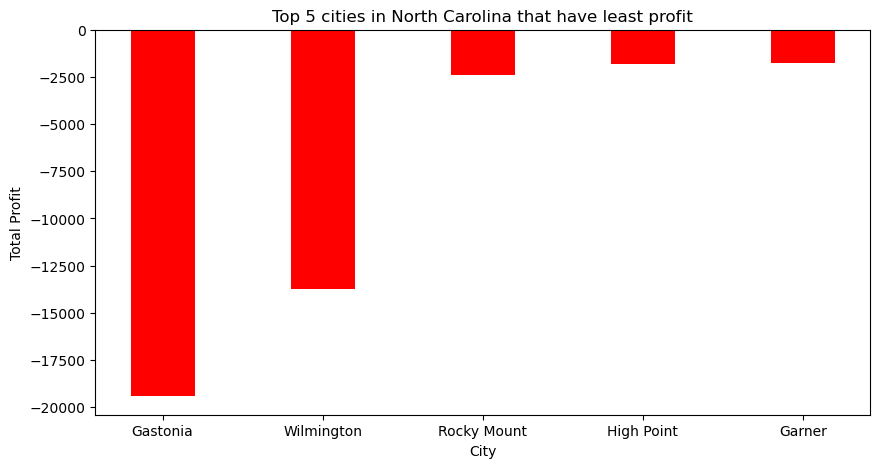

In [92]:
city = leastprofcity.City
sums = leastprof.Profit 

fig = plt.figure(figsize = (10,5))

plt.bar(city, sums, color='red',width = 0.4)
plt.xlabel("City")
plt.ylabel("Total Profit")
plt.title("Top 5 cities in North Carolina that have least profit")
plt.show()

Note :
- The least profitable city in North Carolina is Gastonia